Links zu Dokumentationen/Tutorials für IPython/Python/numpy/matplotlib/git sowie die Sourcodes findet ihr im [GitHub Repo](https://github.com/BerndSchwarzenbacher/numdiff).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

###Modellierung mit Newtonschem Gesetz:
Die tangentiale Kraft $F_{tan}(t) = m \; g \; sin(\alpha(t))$ wirkt entgegen der Rückstellkraft des Pendels:
$F_{R}(t) = -F_{tan}(t) = m \; \ddot \alpha(t) \; l$.

Insgesamt ergibt sich als DGL 2. Ordnung:
$- m \; g \; sin(\alpha(t)) = m \; \ddot \alpha(t) \; l$.

Umgeformt auf ein DGL-System 1. Ordnung:

$\begin{eqnarray}
  \dot \alpha(t) &=& x(t) \\
  \dot x(t)      &=& - \frac{g}{l} sin(\alpha(t))
\end{eqnarray}$

###Modellierung mit Hamiltonschem Prinzip:
Gegeben ist die Energiefunktion: $H(p,q) = -m g l \; cos(q) + \frac{1}{2 m l^{2}} p^{2}$.

Mit den Hamiltonschen Bewegungsgleichungen ergibt sich:

$\begin{eqnarray}
  \dot q &=& \frac{\partial H}{\partial p} &=& p \frac{1}{m l^{2}} \\
  \dot p &=& - \frac{\partial H}{\partial q} &=& - m g l \; sin(q)
\end{eqnarray}$

#Berechnung
###Optionen:

In [2]:
step = 10**(-4)
max_time = 10**4
mass = 1
grav = 1
length = 1

###Anfangswerte:

In [3]:
alpha0 = math.pi/4
alpha_dot_0 = 0

In [4]:
sol_length = max_time/step
time = np.arange(0, max_time, step)
alpha = np.zeros(sol_length, dtype='float64')
alpha_dot = np.zeros(sol_length, dtype='float64')
alpha[0] = alpha0
alpha_dot[0] = alpha_dot_0

###Explizites Eulerverfahren - Iteration:

In [5]:
for i, t in enumerate(time[:-1]):
    alpha[i+1] = alpha[i] + step * alpha_dot[i]
    # alpha_dot[i+1] = alpha_dot[i] - step * grav / length * math.sin(alpha[i])
    alpha_dot[i+1] = alpha_dot[i] - step * math.sin(alpha[i])

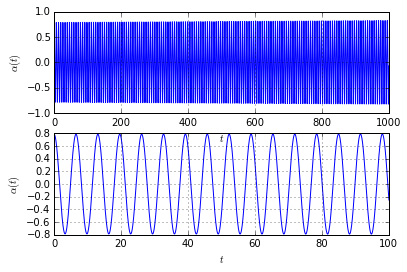

In [6]:
plt.subplot(211)
plt.plot(time[:1000/step], alpha[:1000/step])
plt.ylabel(r'$\alpha(t)$')
plt.xlabel(r'$t$')
plt.grid()

plt.subplot(212)
plt.plot(time[:100/step], alpha[:100/step])
plt.ylabel(r'$\alpha(t)$')
plt.xlabel(r'$t$')
plt.grid()

In [7]:
q = alpha
p = mass * length**2 * alpha_dot
H = - mass * grav * length * np.cos(q) + p**2 / (2 * mass * length**2)

$H(q(t), p(t))$ ist konstant, weil die Energieerhaltung gelten muss: $\frac{d}{dt} H(p(t),q(t)) = 0$

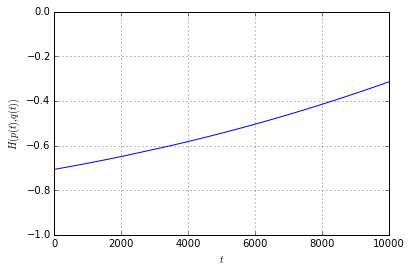

In [8]:
plt.plot(time, H)
plt.ylabel(r'$H(p(t),q(t))$')
plt.xlabel(r'$t$')
plt.axis([0,max_time, -1,0])
plt.grid()

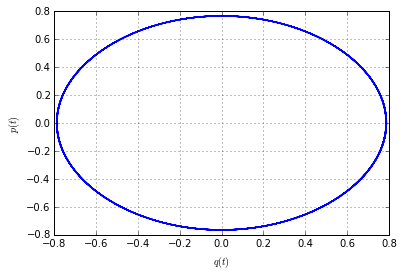

In [9]:
plt.plot(q[:100/step], p[:100/step])
plt.ylabel(r'$p(t)$')
plt.xlabel(r'$q(t)$')
plt.grid()